In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cesar para ver como faz a query consulte https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL
#
#

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[admin_level=2];
(
way[ref="BR-116"](-9.,-41.2,-2.6,-35.17);
way[ref="BR-222"](-9.,-41.2,-2.6,-35.17);
way[ref="BR-020"](-9.,-41.2,-2.6,-35.17);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

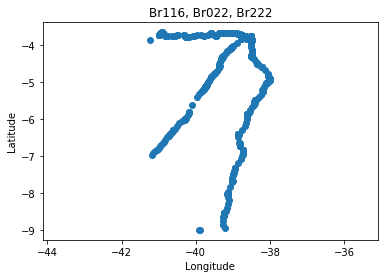

In [3]:
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Br116, Br022, Br222')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()